# Plots for var decomp

In [2]:
import nibabel
import numpy 
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
from Functional_Fusion.dataset import decompose_pattern_into_group_indiv_noise
from scripts import decomposing_variances


In [3]:

data_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest/data/group'
 
 #appending files: 10 conditions, 16 runs; converting to tensor subj x cond x voxels


In [13]:
flat_data = decomposing_variances.get_structure_data()

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = numpy.nan_to_num(tensor_4d)

tensor_avg_cond = tensor_no_nans.mean(axis=1, keepdims=1)

tensor_mean_subtract = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(tensor_subtract).any()

if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
v

tensor_subtract does not contain NaN values.


In [17]:
#Variance decomposition: check 

variances= decompose_pattern_into_group_indiv_noise(tensor_mean_subtract, criterion='subject_wise')
print("global variances:", variances)


global variances: [[-1.42336285e-20 -1.43960286e-02  2.30336457e-01]
 [ 3.15173203e-20 -1.03861321e-02  1.66178113e-01]
 [-4.16841978e-20 -9.77030055e-03  1.56324809e-01]
 [-1.52503163e-20 -1.33850089e-02  2.14160142e-01]
 [-3.05006325e-20 -1.66781989e-02  2.66851183e-01]
 [ 2.94839448e-20 -1.19433798e-02  1.91094076e-01]
 [-3.86341346e-20 -1.13129121e-02  1.81006593e-01]
 [-4.06675101e-20 -1.40819603e-02  2.25311364e-01]]


(10, 390)


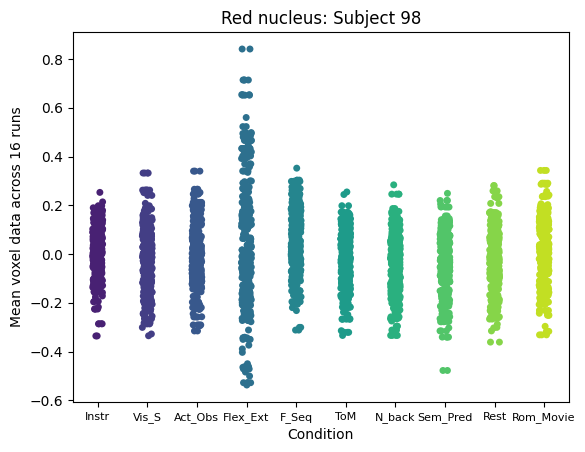

In [21]:
 #PLOT MEANS ACROSS RUNS FOR EACH CONDITION (390 data points per condition; each datapoint is the avg voxel data from 16 runs)

tensor_avg_cond = tensor_no_nans.mean(axis=1)
    
condition_labels = numpy.array(["Instr", "Vis_S", "Act_Obs", "Flex_Ext", "F_Seq", "ToM", "N_back", "Sem_Pred", "Rest", "Rom_Movie"])

data_to_plot = tensor_avg_cond[0,:,:]

df = pandas.DataFrame(data_to_plot.T, columns=condition_labels)
sns.stripplot(data=df, palette="viridis", s=5)
    
plt.xticks(fontsize=8)

plt.xlabel("Condition")
plt.ylabel("Mean voxel data across 16 runs")
plt.title("Red nucleus: Subject 98")

plt.show()


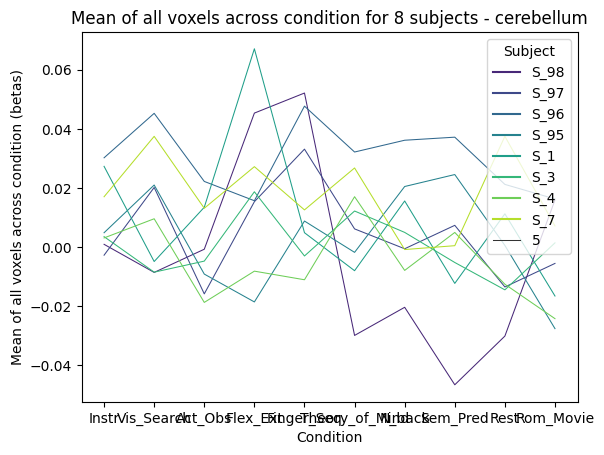

global variances: [[0.00016392        nan        nan]]


/Users/incehusain/Documents/GitHub/Functional_Fusion/Functional_Fusion/dataset.py:480: RuntimeWarning: Mean of empty slice
  SS_2 = np.nanmean(YY[:,same_subj & ~same_part],axis=1)


In [160]:
#PLOT MEANS OF ALL VOXELS IN EACH CONDITION (8 data points per condition)

tensor_avg_cond = tensor_no_nans.mean(axis=1)

condition_labels = numpy.array(["Instr", "Vis_Search", "Act_Obs", "Flex_Ext", "Finger_Seq", "Theory_of_Mind", "N_back", "Sem_Pred", "Rest", "Rom_Movie"])
subject_labels = numpy.array(['S_98', 'S_97', 'S_96', 'S_95', 'S_1', 'S_3', 'S_4', 'S_7'])
    
mean_data_per_subject = numpy.mean(tensor_avg_cond, axis=2)

df = pandas.DataFrame(mean_data_per_subject) 
df.columns = condition_labels

df['Subject'] = numpy.repeat(subject_labels, df.shape[0] // len(subject_labels))[:df.shape[0]]

    
sns.lineplot(x='variable', y='value', hue='Subject', data=df.melt(id_vars='Subject'), palette='viridis', size=5)

plt.xlabel("Condition")
plt.ylabel("Mean of all voxels across condition (betas)")
plt.title("Mean of all voxels across condition for 8 subjects - cerebellum")

plt.show()

tensor_avg_cond_dim = tensor_no_nans.mean(axis=1, keepdims=1)
variances= decompose_pattern_into_group_indiv_noise(tensor_avg_cond_dim, criterion='global')

print("global variances:", variances)

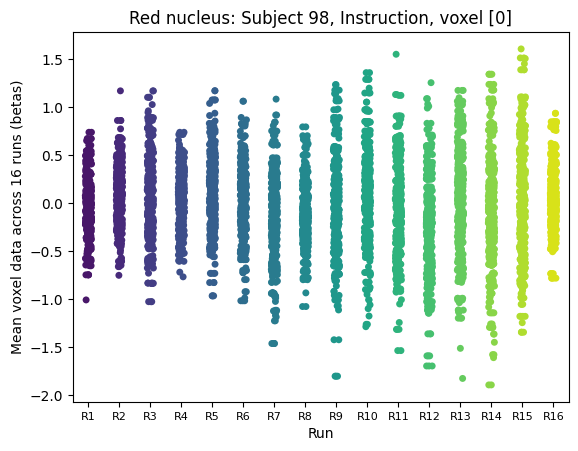

In [128]:
 #PLOTTING RUNS PER CONDITION WITH MEAN SUBTRACTED (390 datapoints per run, each datapoint is data from a voxel )

tensor_avg_cond = tensor_no_nans.mean(axis=1, keepdims=True)

tensor_subtract = tensor_no_nans - tensor_avg_cond

run_labels = numpy.array(["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10", "R11", "R12", "R13", "R14", "R15", "R16"])
data_to_plot = tensor_subtract[0,:,5,:]

df = pandas.DataFrame(data_to_plot.T, columns=run_labels)
sns.stripplot(data=df, palette="viridis", s=5)

plt.xticks(fontsize=8)
plt.xlabel("Run")
plt.ylabel("Mean voxel data across 16 runs (betas)")
plt.title("Red nucleus: Subject 98, Instruction, voxel [0]")

plt.show()


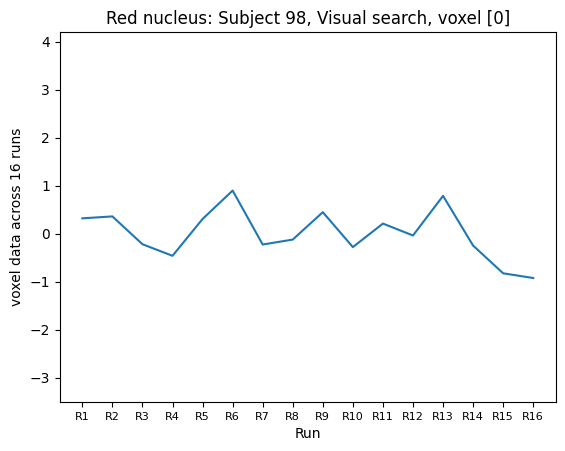

In [147]:
#PLOTTING RUNS PER CONDITION WITH MEAN SUBTRACTED, 1 voxel (1 datapoints per run, each datapoint is data from a single voxel)

tensor_avg_cond = tensor_no_nans.mean(axis=1, keepdims=True)

tensor_subtract = tensor_no_nans - tensor_avg_cond

run_labels = numpy.array(["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10", "R11", "R12", "R13", "R14", "R15", "R16"])
data_to_plot = tensor_subtract[1,:,9,189]

df = pandas.DataFrame({'Run': run_labels, 'Data': data_to_plot})

plt.xticks(fontsize=8)
sns.lineplot(x='Run', y='Data', data=df).set(ylim=(-3.5,4.2))
plt.xlabel("Run")
plt.ylabel("voxel data across 16 runs")
plt.title("Red nucleus: Subject 98, Visual search, voxel [0]")

plt.show()

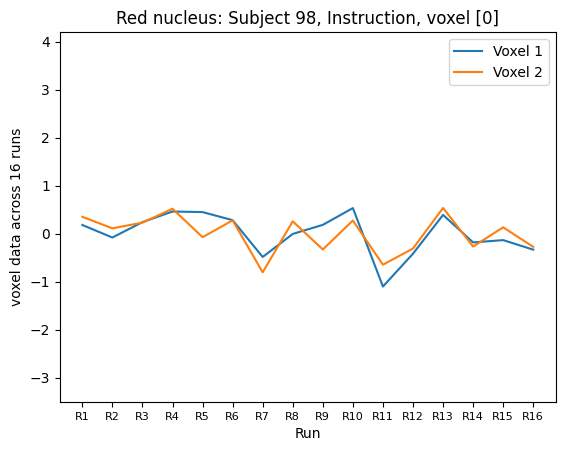

In [149]:
#PLOTTING RUNS PER CONDITION WITH MEAN SUBTRACTED, >1 voxel (1 datapoints per run, each datapoint is data from a single voxel)

tensor_avg_cond = tensor_no_nans.mean(axis=1, keepdims=True)

tensor_subtract = tensor_no_nans - tensor_avg_cond

run_labels = numpy.array(["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10", "R11", "R12", "R13", "R14", "R15", "R16"])
data_to_plot = tensor_subtract[0,:,0,4]
data_to_plot2 = tensor_subtract[0,:,1,4]

df = pandas.DataFrame({'Run': run_labels, 'Data': data_to_plot})
df2 = pandas.DataFrame({'Run': run_labels, 'Data': data_to_plot2})

plt.xticks(fontsize=8)
sns.lineplot(x='Run', y='Data', data=df, label = 'Voxel 1').set(ylim=(-3.5,4.2))
sns.lineplot(x='Run', y='Data', data=df2, label='Voxel 2')
plt.xlabel("Run")
plt.ylabel("voxel data across 16 runs")
plt.title("Red nucleus: Subject 98, Instruction, voxel [0]")

plt.show()

#INSIGHTS:
#voxels 3 and 4 are either two voxels with identical activity or they are the same voxel: activity is exactly the same across all conditions + runs

In [ ]:
#TO FIND LOCATION OF SMALLEST or LARGEST value: 
#numpy.unravel_index(numpy.argmax(tensor_subtract[:,:,:,:]), tensor_subtract.shape)
